# Visualize 3D Points (Parabolic data)
This notebook uses 3D plots to visualize 3D points. Reads measurement data from a csv file.

In [2]:
%matplotlib notebook
##%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from filter.kalman import Kalman3D

fmt = lambda x: "%9.3f" % x
np.set_printoptions(formatter={'float_kind':fmt})

## Read from csv file
import pandas as pd


## Read and Prepare Data
Read ball tracking position data from saved CSV file and prepare mx,my,mz. The file should have dT values along with X,Y,Z values.

We use these as measurements and use Kalman3D tracker to track the ball. Once we exhaust all measurements, we use Kalman3D to predict rest of the trajectory.
*Note*: The position data that we are using is in millimeters and milliseconds. However, the Kalman3D tracker uses all values in meters and seconds. We have do to this conversion here.

In [3]:
# File containing 3D points predicted and measured. Last column with time passage will be ignored
SYNTH = False

if SYNTH:
    data_ = pd.read_csv('data/datafile_parabolic.csv')  ## Synthetic data
else:
    data_ = pd.read_csv('data/input_positions_3.csv')  ## Real data
print(data_.keys())
data = data_/1000.
_mx = np.float32(data['mx'])
_my = np.float32(data['my'])
_mz = np.float32(data['mz'])
if SYNTH:
    ## Drop useless data
    mx = _mx[0:19]
    my = _my[0:19]
    mz = _mz[0:19]
else:
    mx = _mx
    my = _my
    mz = _mz
print("mx: {} {}".format(mx.shape, mx))
print("my: {} {}".format(my.shape, my))
print("mz: {} {}".format(mz.shape, mz))

def getpos(i, x,y,z):
    return(np.float32([x[i],y[i],z[i]]))

Index(['mx', 'my', 'mz'], dtype='object')
mx: (29,) [    1.431     1.424     1.417     1.407     1.402     1.384     1.381
     1.372     1.362     1.358     1.349     1.345     1.338     1.327
     1.325     1.316     1.314     1.304     1.296     1.291     1.283
     1.273     1.267     1.261     1.253     1.244     1.239     1.233
     1.224]
my: (29,) [    0.430     0.472     0.513     0.549     0.586     0.650     0.684
     0.715     0.745     0.768     0.789     0.811     0.825     0.848
     0.864     0.880     0.893     0.900     0.900     0.913     0.919
     0.927     0.931     0.934     0.937     0.927     0.926     0.926
     0.917]
mz: (29,) [    4.151     4.282     4.406     4.550     4.681     4.946     5.083
     5.202     5.331     5.465     5.594     5.721     5.859     5.976
     6.106     6.220     6.339     6.481     6.628     6.737     6.861
     6.976     7.095     7.218     7.332     7.488     7.595     7.706
     7.834]


## Track and Predict
Now we use our Kalman3D tracker to  track the position of the ball based on measured data and then predict the trajectory when all measurement data is exhausted.

In [4]:
fps = 100.
dT  = (1 / fps)
print("dT: {:f}".format(dT))
KF = Kalman3D(drg=1.0, dbg=0)
pred = KF.init(getpos(0,mx,my,mz))
print("pred: {}".format(pred))
##-#######################################################################################
## Tracking
## Since we are doing all operations in zero time, specify dT manually (e.g., 0.033 sec)
px = np.float32([pred[0]])
py = np.float32([pred[1]])
pz = np.float32([pred[2]])
for i in range(len(mx)-1):
    pred = KF.track(getpos([i+1], mx, my, mz), dT)
    px = np.append(px, pred[0])
    py = np.append(py, pred[1])
    pz = np.append(pz, pred[2])
    print("  tracked position : {}".format(pred*1000))

##-#######################################################################################
## Trajectory prediction
## Since we are doing all operations in zero time, specify dT manually (e.g., 0.033 sec)
for ii in range(15):
    pred = KF.predict(dT)   # Use last value of dT for all predictions
    px = np.append(px, pred[0])
    py = np.append(py, pred[1])
    pz = np.append(pz, pred[2])
    print("predicted position : {}".format(pred*1000))

dT: 0.010000
pred: [    1.431     0.430     4.151]
  tracked position : [ 1429.714   442.714  4189.143]
  tracked position : [ 1425.120   471.396  4278.191]
  tracked position : [ 1417.502   505.861  4401.273]
  tracked position : [ 1410.771   542.338  4532.719]
  tracked position : [ 1398.548   592.156  4730.136]
  tracked position : [ 1390.440   635.028  4902.886]
  tracked position : [ 1381.709   672.708  5053.579]
  tracked position : [ 1372.141   707.147  5197.214]
  tracked position : [ 1365.022   736.481  5339.557]
  tracked position : [ 1356.791   762.105  5478.817]
  tracked position : [ 1350.411   786.236  5615.423]
  tracked position : [ 1343.558   805.635  5755.973]
  tracked position : [ 1334.472   826.947  5888.173]
  tracked position : [ 1328.659   845.829  6022.211]
  tracked position : [ 1321.131   863.407  6149.140]
  tracked position : [ 1316.185   878.791  6274.603]
  tracked position : [ 1308.629   889.998  6410.663]
  tracked position : [ 1300.682   895.459  6554.

px size (44,)
tm size (44,)
PX, MX


<IPython.core.display.Javascript object>


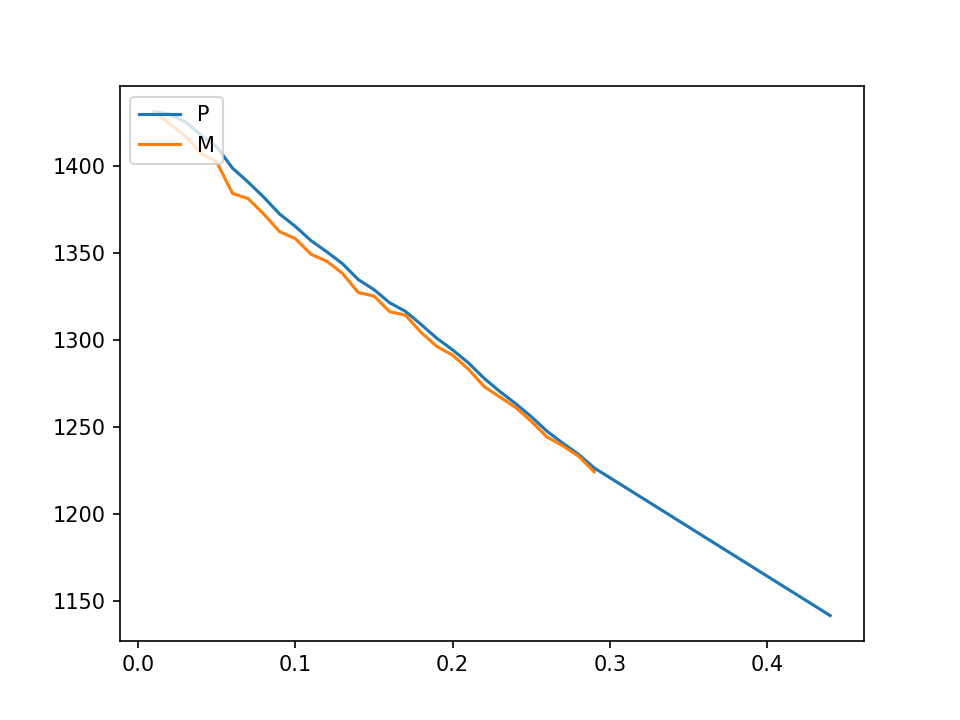

PY, MY


<IPython.core.display.Javascript object>


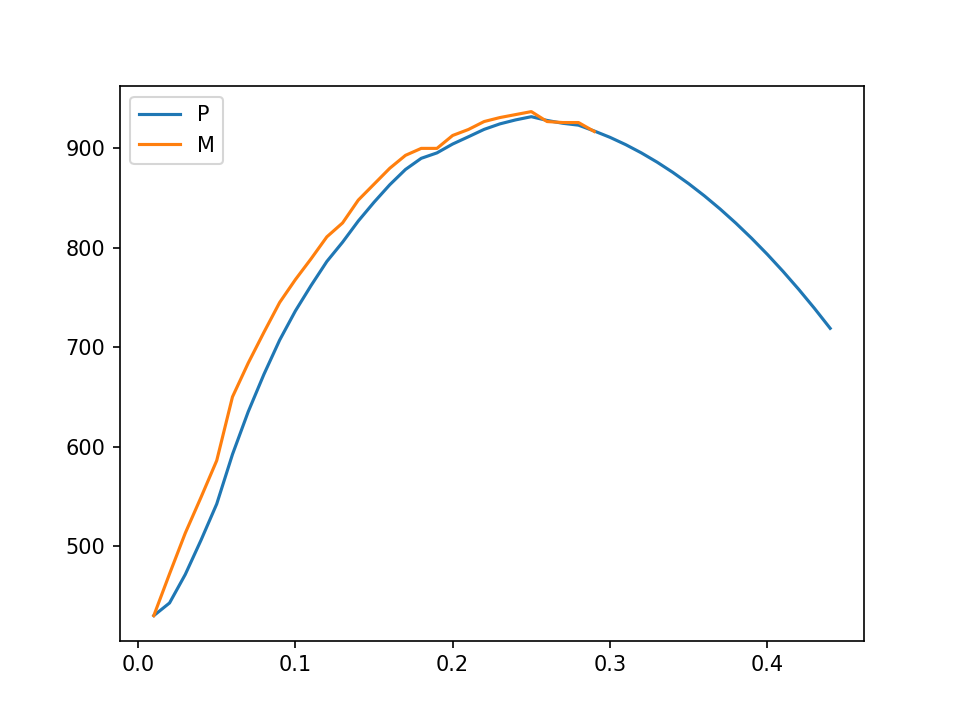

PZ, MZ


<IPython.core.display.Javascript object>


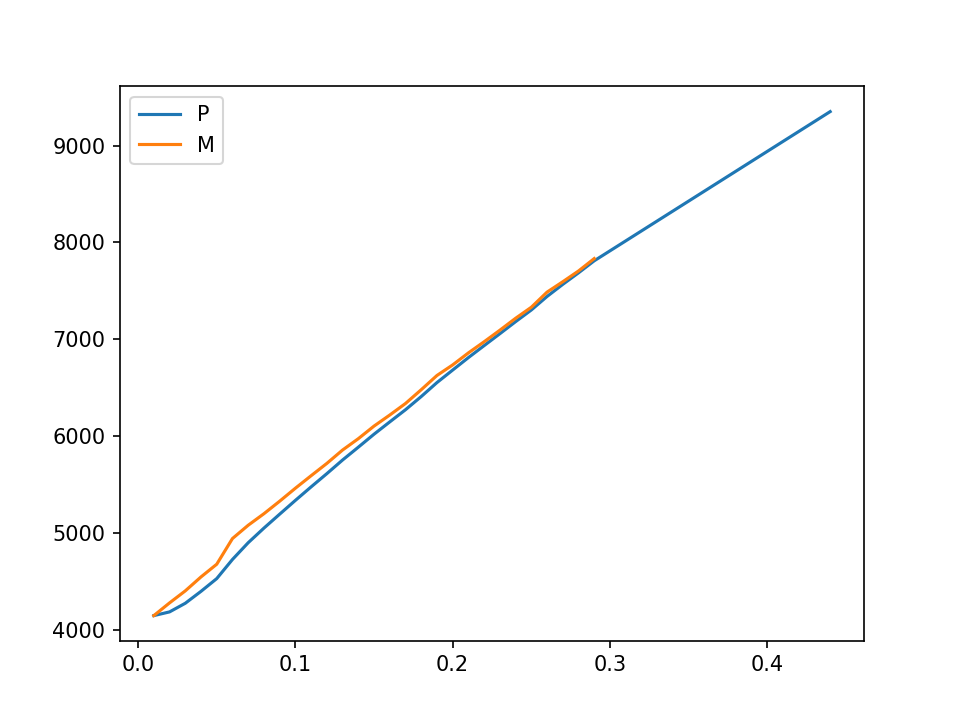

In [5]:
sum = 0
tm  = np.zeros(len(px))
for i in range(len(tm)):
    sum += dT
    tm[i] = sum

## Convert mx also back to millimeters.
px = px * 1000.
py = py * 1000.
pz = pz * 1000.
nmx = mx * 1000.
nmy = my * 1000.
nmz = mz * 1000.
ntm = tm * 1000.
##-#######################################################################################
## Everything is in millimeters and milliseconds now
##-#######################################################################################
print("px size", px.shape)
print("tm size", tm.shape)

## Visualize X, Y, and Z individually
## In the plot below, we visualize the pairs of px, mx; py, my and pz, mz to see how they relate to each other
print("PX, MX")
fig1a = plt.figure()
plt.plot(tm, px)
plt.plot(tm[0:len(nmx)], nmx)
plt.legend('PM', ncol=1, loc='upper left')

print("PY, MY")
fig1b = plt.figure()
plt.plot(tm, py)
plt.plot(tm[0:len(nmy)], nmy)
plt.legend('PM', ncol=1, loc='upper left')

print("PZ, MZ")
fig1c = plt.figure()
plt.plot(tm, pz)
plt.plot(tm[0:len(nmz)], nmz)
plt.legend('PM', ncol=1, loc='upper left')

## Visualize (X,Y,Z) of Predicted and Measured in Points in 3D
In the plot below, we visualize all the predicted and measured points in 3D. This gives a more realistic view of how the predicted points are related to the measured points.

<IPython.core.display.Javascript object>


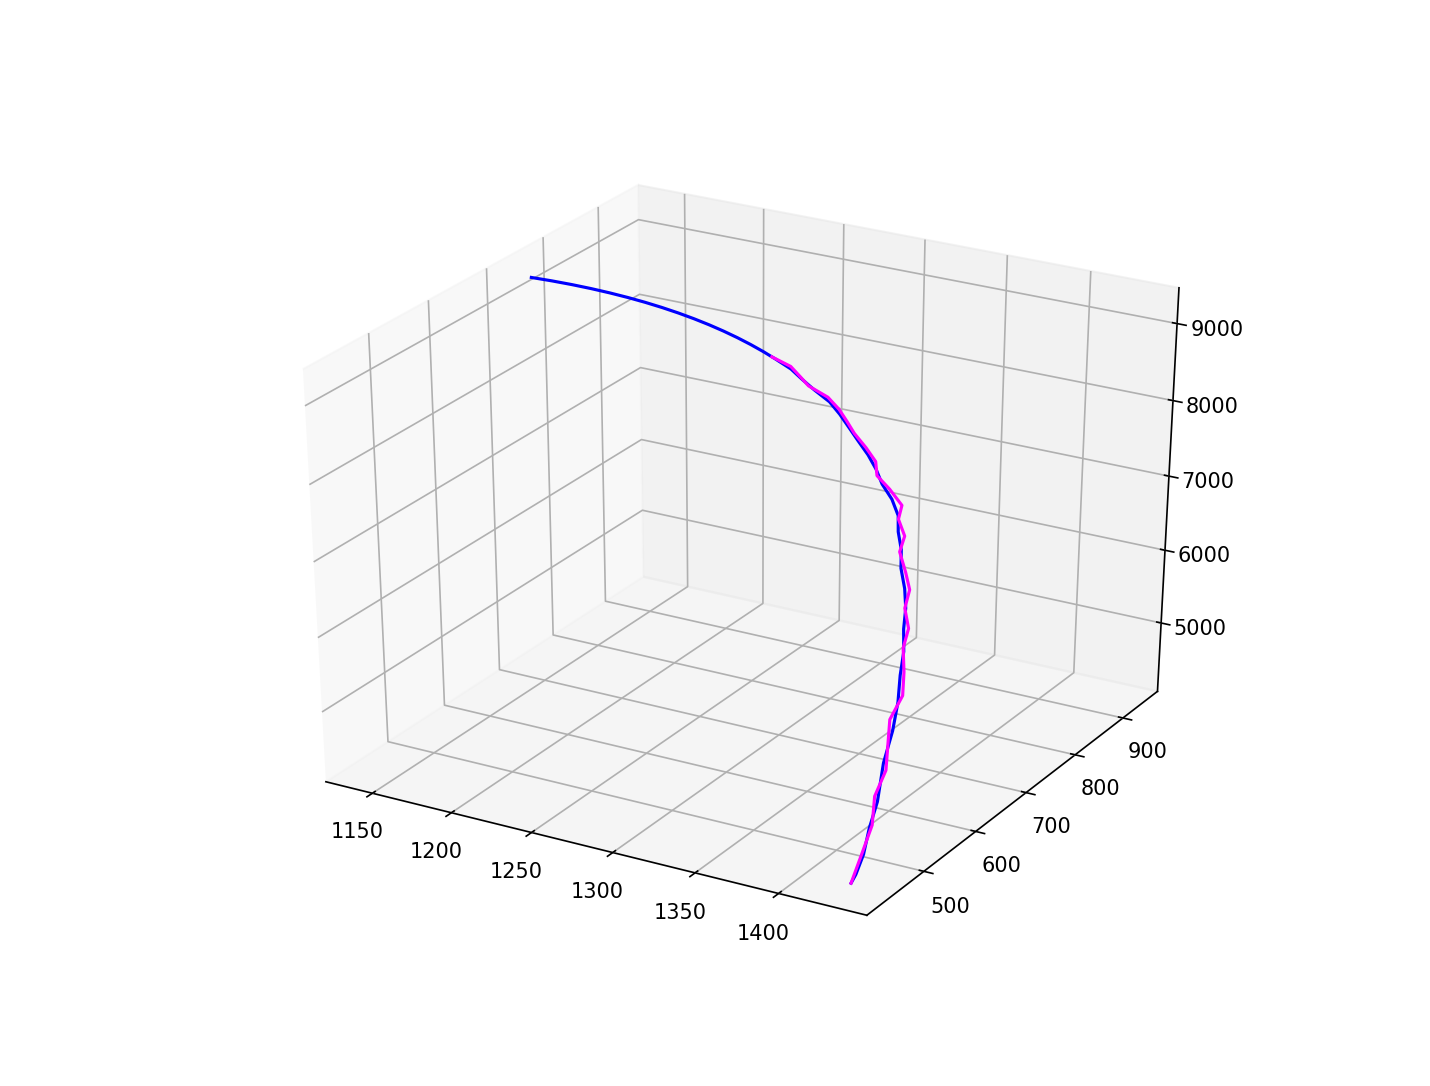

In [6]:
fig2 = plt.figure()
ax = plt.axes(projection='3d')
#ax.set_xlim3d(-2000,2000)
#ax.set_ylim3d(-2000,2000)
#ax.set_zlim3d(-2000,2000)

if 0: ## Plot axis or not
    st = [0,0,0]
    xx = [200,   0,   0]
    yy = [  0, 200,   0]
    zz  =[  0,   0, 200]
    for i in range(len(st)):
        ax.plot([st[i], xx[i]], [st[i],yy[i]],zs=[st[i],zz[i]])

ax.plot3D(px, py, pz, 'blue')
ax.plot3D(nmx, nmy, nmz, 'magenta')
